# EAD + Clustering Analysis 🔥🔥🔥

### Key Finding: 

By adopting the **k-means clustering** algorithm (exlcuding the Churn column), the data was able to be grouped into 4 clusters with one cluster clearly stands out with an **extremely high churn rate (98.7%)**.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

# Import Data

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [3]:
print("Number of instances: %d" % df.shape[0])
print("Number of features: %d" % df.shape[1])

Number of instances: 7043
Number of features: 21


# Split Data

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
print(len(df_train), len(df_test))

5634 1409


# Data Preprocess

1. Convert the column **TotalCharges** from string to numerical
2. Replace Yes/No with 1/0 for the column **Churn**

In [5]:
df_train.TotalCharges = df_train['TotalCharges'].replace(' ', '0', regex=True)
df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges)

df_test.TotalCharges = df_test['TotalCharges'].replace(' ', '0', regex=True)
df_test.TotalCharges = pd.to_numeric(df_test.TotalCharges)

In [6]:
df_train['Churn'] = df_train['Churn'].map({'Yes':1, 'No':0})
df_test['Churn'] = df_test['Churn'].map({'Yes':1, 'No':0})

# Data Overview

1. Data types
2. Missing and duplicated values
3. General statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [11]:
df.describe(include=['O'])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

# Exploratory Analysis

1. **Output Variable**
2. **Demographic Information**: gender,SeniorCitizen,Partner,Dependents
3. **Service Information**: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
4. **Account Information**: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

## Output Variables

Percentage of positive churn outcome: 0.26641817536386225


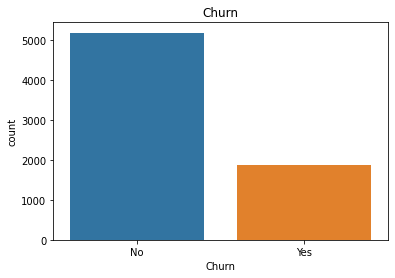

In [12]:
print(f"Percentage of positive churn outcome: {df_train['Churn'].sum()/len(df_train)}")

sn.countplot(x=df['Churn'])
plt.title('Churn')
plt.show()

## Demographic Information

In [13]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']

for feature in demo_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

gender     Churn
0  Female  0.272985
1    Male  0.259851

SeniorCitizen     Churn
1              1  0.418401
0              0  0.237026

Partner     Churn
0      No  0.330581
1     Yes  0.198020

Dependents     Churn
0         No  0.315016
1        Yes  0.152522

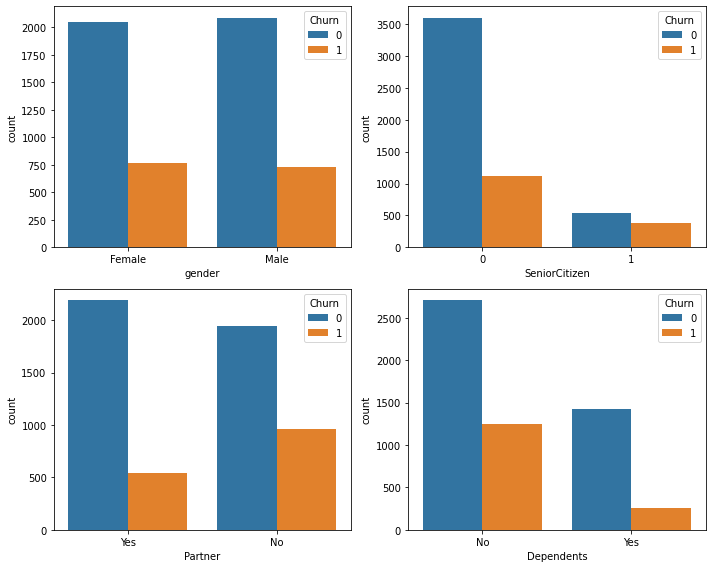

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sn.countplot(x="gender", hue="Churn", data=df_train, ax=axes[0,0])
sn.countplot(x="SeniorCitizen", hue="Churn", data=df_train, ax=axes[0,1])
sn.countplot(x="Partner", hue="Churn", data=df_train, ax=axes[1,0])
sn.countplot(x="Dependents", hue="Churn", data=df_train, ax=axes[1,1])
        
plt.tight_layout()
plt.show()

## Service Information

In [15]:
service_features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for feature in service_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

PhoneService     Churn
1          Yes  0.269049
0           No  0.241697

MultipleLines     Churn
2               Yes  0.289629
0                No  0.251103
1  No phone service  0.241697

InternetService     Churn
1     Fiber optic  0.419952
0             DSL  0.187435
2              No  0.078560

OnlineSecurity     Churn
0                   No  0.417114
2                  Yes  0.148240
1  No internet service  0.078560

OnlineBackup     Churn
0                   No  0.409183
2                  Yes  0.203998
1  No internet service  0.078560

DeviceProtection     Churn
0                   No  0.392799
2                  Yes  0.223711
1  No internet service  0.078560

TechSupport     Churn
0                   No  0.416488
2                  Yes  0.147826
1  No internet service  0.078560

StreamingTV     Churn
0                   No  0.334531
2                  Yes  0.302059
1  No internet service  0.078560

StreamingMovies     Churn
0                   No  0.342638
2                  Yes  0.293930
1  No internet service  0.078560

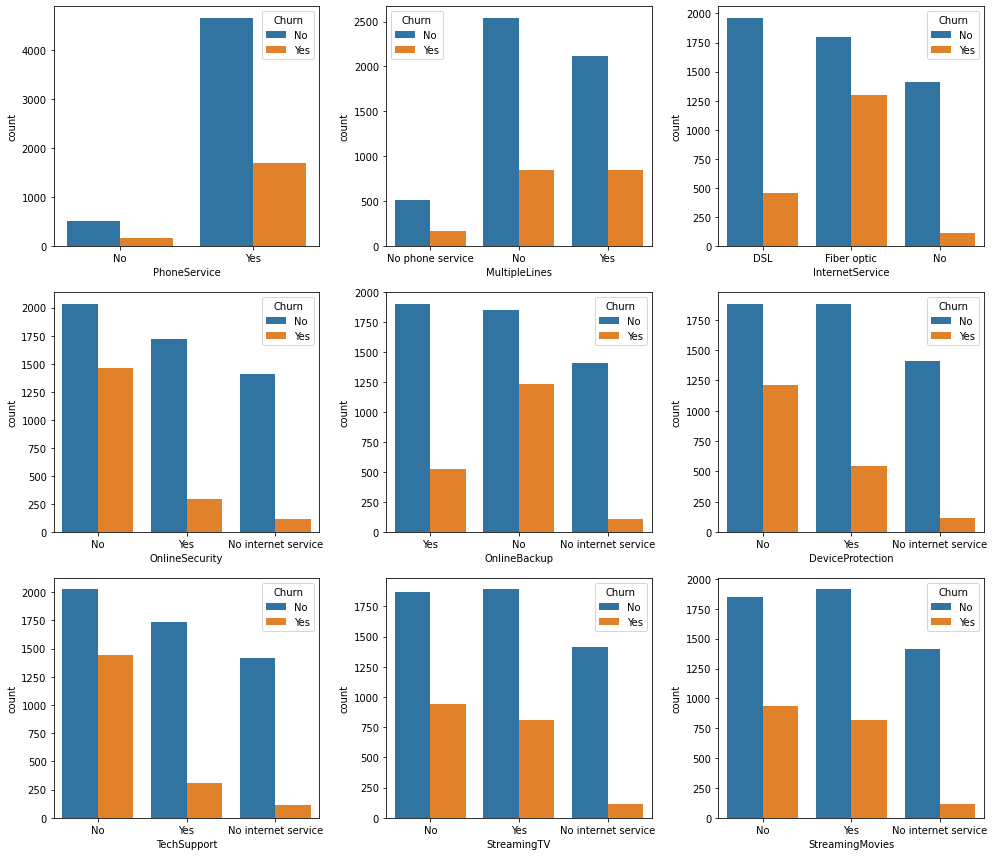

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

sn.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0])
sn.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1])
sn.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2])
sn.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0])
sn.countplot(x="OnlineBackup", hue="Churn", data=df, ax=axes[1,1])
sn.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,2])
sn.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[2,0])
sn.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,1])
sn.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,2])

plt.tight_layout()
plt.show()

## Account Information

In [17]:
acc_features = ['tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
cat_acc_features = ['Contract','PaperlessBilling','PaymentMethod']
num_acc_features = ['tenure','MonthlyCharges','TotalCharges']

for feature in cat_acc_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

Contract     Churn
0  Month-to-month  0.430774
1        One year  0.102954
2        Two year  0.028443

PaperlessBilling     Churn
1              Yes  0.335914
0               No  0.163884

PaymentMethod     Churn
2           Electronic check  0.459916
3               Mailed check  0.195552
0  Bank transfer (automatic)  0.162903
1    Credit card (automatic)  0.144054

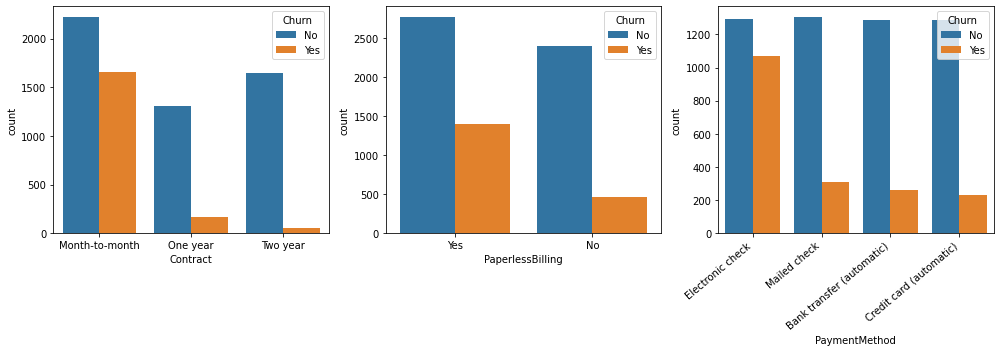

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sn.countplot(x="Contract", hue="Churn", data=df, ax=axes[0])
sn.countplot(x="PaperlessBilling", hue="Churn", data=df, ax=axes[1])
sn.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

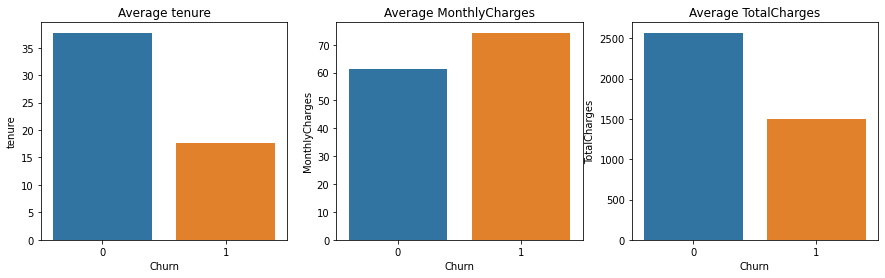

In [19]:
df_churn = df_train.groupby(['Churn'], as_index=False).mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for i in range(3):
    feature = num_acc_features[i]
    sn.barplot(x='Churn',y=feature, data=df_churn, ax=axes[i])
    axes[i].set_title(f"Average {feature}")
    axes[i].set_xlabel(f'Churn')
    axes[i].set_ylabel(f"{feature}")

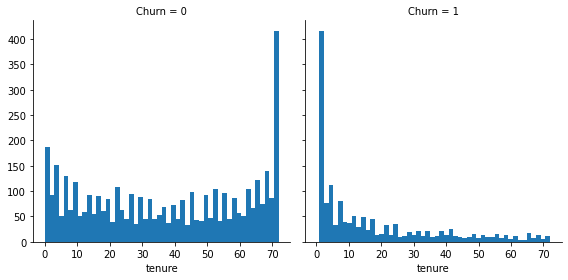

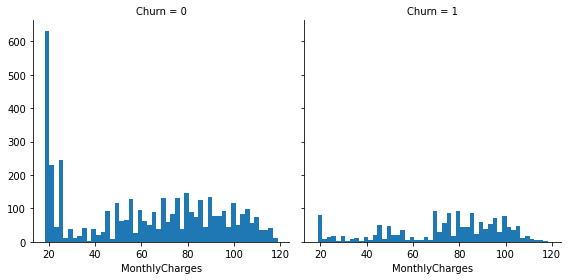

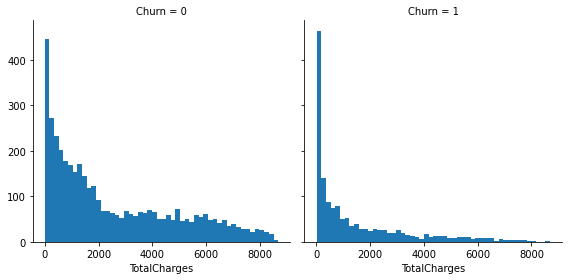

In [20]:
for feature in ['tenure','MonthlyCharges','TotalCharges']:
    g = sn.FacetGrid(df_train, col='Churn', height=4)
    g.map(plt.hist, feature, bins=50)
    plt.show()

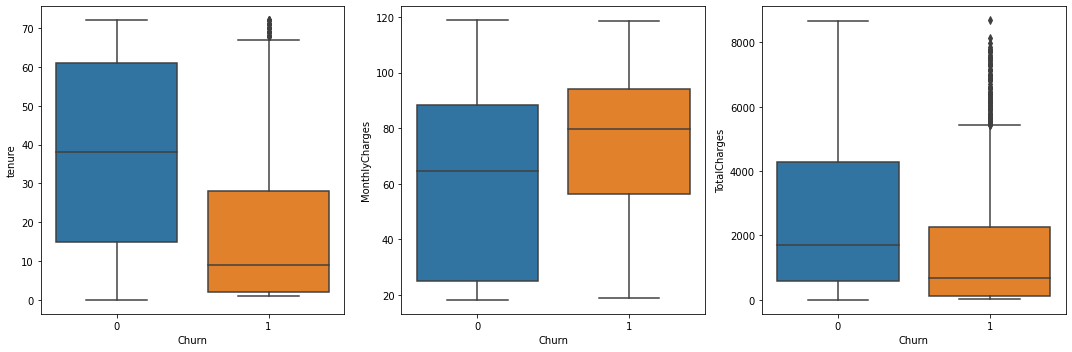

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i in range(3):
    feature = num_acc_features[i]
    sn.boxplot(data=df_train, x='Churn', y=feature, ax=axes[i])
plt.tight_layout()
plt.show()

# Clustering 

1. **Data Preparation** for clustering
2. **K-means** clustering
3. Set the clustering labels as a **new feature**

In [22]:
df_cs = df_train.drop(['customerID'], axis=1).copy()
df_cs_test = df_test.drop(['customerID'], axis=1).copy()

numerical_index = (df_cs.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)

categorical_index = (df_cs.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cs[numerical_features] = scaler.fit_transform(df_cs[numerical_features])
df_cs_test[numerical_features] = scaler.transform(df_cs_test[numerical_features])

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_cs[categorical_features] = encoder.fit_transform(df_cs[categorical_features])
df_cs_test[categorical_features] = encoder.transform(df_cs_test[categorical_features])

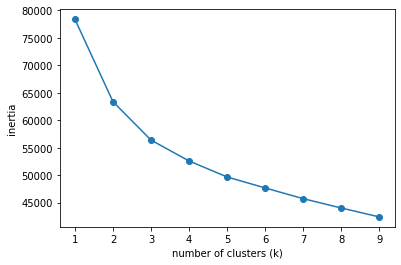

In [23]:
from sklearn.cluster import KMeans

num_clusters = list(range(1,10))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_cs)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

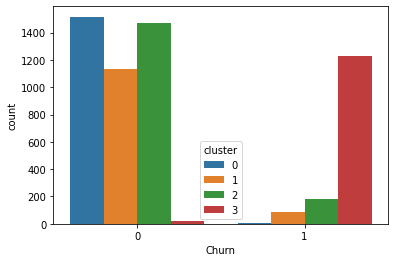

In [24]:
k = 4
model = KMeans(n_clusters=k, random_state=0)
model.fit(df_cs)
train_labels = model.predict(df_cs)
test_labels = model.predict(df_cs_test)

df_train['cluster'] = train_labels
df_test['cluster'] = test_labels
sn.countplot(x='Churn', hue="cluster", data=df_train)
plt.show()

In [25]:
churn_rate_cluster_3 = df_train[df_train['cluster']==3]['Churn'].sum() / len(df_train[df_train['cluster']==3])
churn_rate_cluster_3

0.9863782051282052

### This cluster column can be used as a new feature when training models.